In [1]:
# подключение основных библиотек
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

from catboost import CatBoostClassifier

In [2]:
#запускаем метрики и вспомогательные модули 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

#подключение библиотеки для вычисления метрик
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve

#Подгружаем таблички метрик 
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#подгружаем и просматриваем наш датасет на 1660 файлов
df = pd.read_csv('1660_films.csv')
df

,ID_kinopoisk,week,month,screens,budget,age_R,time,genre_box_buget,genre_avr_kinopoisk_R,genre_avr_box,...,skr2_box_buget,skr2_avr_kinopoisk_R,skr2_avr_box,skr2_avr_views,box_budget,kinopoisk_R,box,views,rezult,rezult4
0,70952.0,7,2,100,46096480.0,12.0,115.0,0.51,6.18,66377566,...,1.17,7.40,54000000.0,551000.0,1.17,7.4,54000000,551000,0,1
1,77396.0,14,4,117,57620600.0,0.0,98.0,0.94,5.23,181394667,...,0.78,4.80,45000000.0,464000.0,0.78,4.8,45000000,464000,0,0
2,79850.0,28,7,315,121003260.0,16.0,115.0,0.94,5.23,181394667,...,1.66,6.33,209666667.0,2029000.0,3.84,6.1,465000000,4400000,1,3
3,253754.0,40,9,47,46096480.0,12.0,101.0,0.51,6.18,66377566,...,0.25,5.90,24275000.0,124000.0,0.16,6.4,7300000,61000,0,0
4,252013.0,44,10,188,57620600.0,6.0,90.0,1.19,6.07,148983326,...,0.33,6.70,19000000.0,295000.0,0.33,6.7,19000000,295000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,4493006.0,15,4,1656,39100000.0,12.0,91.0,1.88,5.36,129218872,...,0.25,5.90,24275000.0,124000.0,0.52,6.3,20396022,75750,0,0
1657,4400163.0,15,4,235,51790451.0,18.0,75.0,0.51,6.18,66377566,...,0.02,0.00,881000.0,2634.0,0.02,6.0,881000,2634,0,0
1658,5059142.0,16,4,23,79817750.0,16.0,101.0,0.51,6.18,66377566,...,1.04,7.10,16541000.0,84123.0,0.29,6.0,82000,245,0,0
1659,5002368.0,16,4,66,79817750.0,18.0,120.0,0.51,6.18,66377566,...,0.00,0.00,496626.0,1411.0,0.29,6.0,496626,1411,0,0


In [6]:
#Отбираем признаки для работы и  столбец с откликами
cols = ["week", "month","screens","budget","age_R","time",
        "genre_box_buget","genre_avr_kinopoisk_R", "genre_avr_box","genre_avr_views",
        "genre2_box_buget","genre2_avr_kinopoisk_R","genre2_avr_box","genre2_avr_views",
        "dir_box_buget", "dir_avr_kinopoisk_R","dir_avr_box","dir_avr_views",
        "skr1_box_buget", "skr1_avr_kinopoisk_R", "skr1_avr_box", "skr1_avr_views",
        "skr2_box_buget", "skr2_avr_kinopoisk_R","skr2_avr_box", "skr2_avr_views"] # назначаем столбцы 
X = df[cols] # отбираем оцениваемые признаки-предикторы
y = df["rezult4"] # отбираем столбец с откликами

In [7]:
# Увеличение выборки с использованием библиотеки imbalanced-learn (Python)
from imblearn.over_sampling import RandomOverSampler

# Создание экземпляра RandomOverSampler
ros = RandomOverSampler()

# Применение увеличения выборки к данным
X, y = ros.fit_resample(X, y)

In [8]:
from sklearn.model_selection import train_test_split
#Делим выборку на тренинговую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # делим выборку 70/30 - тренинговая/тестовая

In [9]:
# Задание базовой модели
model = CatBoostClassifier(random_state = 42)


In [10]:
# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

Learning rate set to 0.084665
0:	learn: 1.2754226	total: 159ms	remaining: 2m 38s
1:	learn: 1.1856916	total: 169ms	remaining: 1m 24s
2:	learn: 1.1092924	total: 183ms	remaining: 1m
3:	learn: 1.0493159	total: 194ms	remaining: 48.2s
4:	learn: 0.9895856	total: 205ms	remaining: 40.8s
5:	learn: 0.9448907	total: 215ms	remaining: 35.6s
6:	learn: 0.9019449	total: 226ms	remaining: 32s
7:	learn: 0.8609879	total: 237ms	remaining: 29.4s
8:	learn: 0.8291246	total: 247ms	remaining: 27.2s
9:	learn: 0.7970225	total: 258ms	remaining: 25.5s
10:	learn: 0.7684568	total: 268ms	remaining: 24.1s
11:	learn: 0.7446415	total: 278ms	remaining: 22.9s
12:	learn: 0.7168038	total: 289ms	remaining: 21.9s
13:	learn: 0.6971239	total: 300ms	remaining: 21.1s
14:	learn: 0.6790543	total: 310ms	remaining: 20.3s
15:	learn: 0.6570845	total: 320ms	remaining: 19.7s
16:	learn: 0.6404131	total: 331ms	remaining: 19.2s
17:	learn: 0.6243016	total: 341ms	remaining: 18.6s
18:	learn: 0.6071779	total: 351ms	remaining: 18.1s
19:	learn: 0.5

165:	learn: 0.1137431	total: 1.87s	remaining: 9.41s
166:	learn: 0.1131597	total: 1.88s	remaining: 9.39s
167:	learn: 0.1128665	total: 1.89s	remaining: 9.38s
168:	learn: 0.1119138	total: 1.9s	remaining: 9.37s
169:	learn: 0.1112607	total: 1.92s	remaining: 9.35s
170:	learn: 0.1108218	total: 1.93s	remaining: 9.33s
171:	learn: 0.1104135	total: 1.94s	remaining: 9.32s
172:	learn: 0.1099184	total: 1.95s	remaining: 9.3s
173:	learn: 0.1092530	total: 1.96s	remaining: 9.28s
174:	learn: 0.1088316	total: 1.97s	remaining: 9.31s
175:	learn: 0.1084054	total: 1.98s	remaining: 9.29s
176:	learn: 0.1080174	total: 1.99s	remaining: 9.28s
177:	learn: 0.1076702	total: 2s	remaining: 9.26s
178:	learn: 0.1070685	total: 2.02s	remaining: 9.24s
179:	learn: 0.1065649	total: 2.02s	remaining: 9.22s
180:	learn: 0.1058251	total: 2.04s	remaining: 9.21s
181:	learn: 0.1051908	total: 2.04s	remaining: 9.19s
182:	learn: 0.1047492	total: 2.06s	remaining: 9.18s
183:	learn: 0.1040189	total: 2.07s	remaining: 9.17s
184:	learn: 0.103

339:	learn: 0.0506990	total: 3.6s	remaining: 6.99s
340:	learn: 0.0504053	total: 3.61s	remaining: 6.98s
341:	learn: 0.0502788	total: 3.62s	remaining: 6.97s
342:	learn: 0.0499229	total: 3.63s	remaining: 6.96s
343:	learn: 0.0497506	total: 3.64s	remaining: 6.95s
344:	learn: 0.0493418	total: 3.65s	remaining: 6.93s
345:	learn: 0.0491112	total: 3.66s	remaining: 6.92s
346:	learn: 0.0489023	total: 3.67s	remaining: 6.91s
347:	learn: 0.0488146	total: 3.68s	remaining: 6.9s
348:	learn: 0.0487377	total: 3.69s	remaining: 6.89s
349:	learn: 0.0484427	total: 3.7s	remaining: 6.87s
350:	learn: 0.0481630	total: 3.71s	remaining: 6.86s
351:	learn: 0.0480302	total: 3.72s	remaining: 6.85s
352:	learn: 0.0478255	total: 3.73s	remaining: 6.84s
353:	learn: 0.0476944	total: 3.74s	remaining: 6.83s
354:	learn: 0.0475110	total: 3.75s	remaining: 6.81s
355:	learn: 0.0474056	total: 3.76s	remaining: 6.8s
356:	learn: 0.0473162	total: 3.77s	remaining: 6.79s
357:	learn: 0.0471423	total: 3.78s	remaining: 6.78s
358:	learn: 0.04

509:	learn: 0.0290095	total: 5.36s	remaining: 5.15s
510:	learn: 0.0288406	total: 5.37s	remaining: 5.14s
511:	learn: 0.0287336	total: 5.38s	remaining: 5.13s
512:	learn: 0.0286462	total: 5.39s	remaining: 5.12s
513:	learn: 0.0285627	total: 5.4s	remaining: 5.11s
514:	learn: 0.0284765	total: 5.41s	remaining: 5.1s
515:	learn: 0.0284410	total: 5.42s	remaining: 5.09s
516:	learn: 0.0283449	total: 5.43s	remaining: 5.07s
517:	learn: 0.0282672	total: 5.44s	remaining: 5.06s
518:	learn: 0.0282058	total: 5.45s	remaining: 5.05s
519:	learn: 0.0281424	total: 5.46s	remaining: 5.04s
520:	learn: 0.0281147	total: 5.47s	remaining: 5.03s
521:	learn: 0.0280048	total: 5.48s	remaining: 5.02s
522:	learn: 0.0278980	total: 5.49s	remaining: 5.01s
523:	learn: 0.0278136	total: 5.5s	remaining: 5s
524:	learn: 0.0276905	total: 5.51s	remaining: 4.99s
525:	learn: 0.0276336	total: 5.52s	remaining: 4.98s
526:	learn: 0.0275754	total: 5.53s	remaining: 4.96s
527:	learn: 0.0275470	total: 5.54s	remaining: 4.96s
528:	learn: 0.0274

684:	learn: 0.0183545	total: 7.07s	remaining: 3.25s
685:	learn: 0.0183100	total: 7.08s	remaining: 3.24s
686:	learn: 0.0182936	total: 7.09s	remaining: 3.23s
687:	learn: 0.0182608	total: 7.1s	remaining: 3.22s
688:	learn: 0.0182410	total: 7.11s	remaining: 3.21s
689:	learn: 0.0181960	total: 7.12s	remaining: 3.2s
690:	learn: 0.0181402	total: 7.13s	remaining: 3.19s
691:	learn: 0.0180956	total: 7.14s	remaining: 3.18s
692:	learn: 0.0180307	total: 7.15s	remaining: 3.17s
693:	learn: 0.0180169	total: 7.16s	remaining: 3.15s
694:	learn: 0.0179252	total: 7.17s	remaining: 3.14s
695:	learn: 0.0178934	total: 7.17s	remaining: 3.13s
696:	learn: 0.0178378	total: 7.18s	remaining: 3.12s
697:	learn: 0.0178207	total: 7.19s	remaining: 3.11s
698:	learn: 0.0178011	total: 7.2s	remaining: 3.1s
699:	learn: 0.0177858	total: 7.21s	remaining: 3.09s
700:	learn: 0.0177637	total: 7.22s	remaining: 3.08s
701:	learn: 0.0176981	total: 7.23s	remaining: 3.07s
702:	learn: 0.0176558	total: 7.24s	remaining: 3.06s
703:	learn: 0.01

843:	learn: 0.0133714	total: 8.6s	remaining: 1.59s
844:	learn: 0.0133550	total: 8.61s	remaining: 1.58s
845:	learn: 0.0133109	total: 8.62s	remaining: 1.57s
846:	learn: 0.0132896	total: 8.63s	remaining: 1.56s
847:	learn: 0.0132840	total: 8.64s	remaining: 1.55s
848:	learn: 0.0132764	total: 8.65s	remaining: 1.54s
849:	learn: 0.0132595	total: 8.66s	remaining: 1.53s
850:	learn: 0.0132380	total: 8.67s	remaining: 1.52s
851:	learn: 0.0132139	total: 8.68s	remaining: 1.51s
852:	learn: 0.0131933	total: 8.68s	remaining: 1.5s
853:	learn: 0.0131723	total: 8.69s	remaining: 1.49s
854:	learn: 0.0131458	total: 8.7s	remaining: 1.48s
855:	learn: 0.0131137	total: 8.71s	remaining: 1.47s
856:	learn: 0.0131006	total: 8.72s	remaining: 1.46s
857:	learn: 0.0130766	total: 8.73s	remaining: 1.45s
858:	learn: 0.0130526	total: 8.74s	remaining: 1.43s
859:	learn: 0.0130278	total: 8.75s	remaining: 1.42s
860:	learn: 0.0130018	total: 8.76s	remaining: 1.41s
861:	learn: 0.0129813	total: 8.77s	remaining: 1.4s
862:	learn: 0.01

In [11]:
# Получаем предсказания модели на тестовых данных
y_pred = model.predict(X_test)


In [12]:
# Измерение площади под ROC-кривой
y_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC AUC score:", roc_auc)

ROC AUC score: 0.9999618423116133


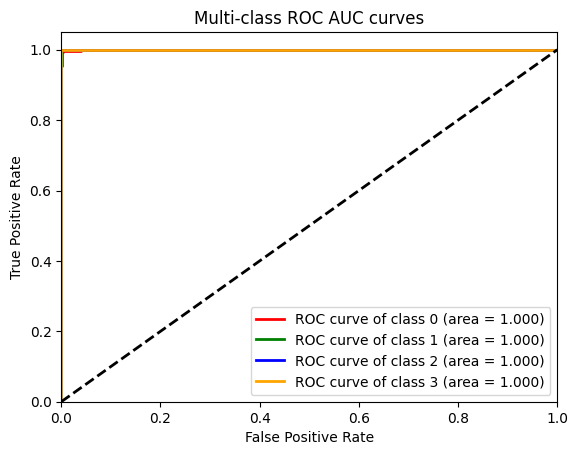

In [13]:
from sklearn.preprocessing import label_binarize

# Перевод меток классов в формат one-vs-all
y_test_b = label_binarize(y_test, classes=[0, 1, 2, 3])

# Вычисление значений кривых ROC AUC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение кривых ROC AUC для всех классов
plt.figure()
colors = ['red', 'green', 'blue', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.3f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC AUC curves')
plt.legend(loc="lower right")
plt.show()

In [14]:
# Вывод метрик модели
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9515    0.9751       433
           1     0.9632    1.0000    0.9813       393
           2     0.9922    1.0000    0.9961       381
           3     0.9927    1.0000    0.9963       409

    accuracy                         0.9870      1616
   macro avg     0.9870    0.9879    0.9872      1616
weighted avg     0.9874    0.9870    0.9869      1616



In [15]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Confusion Matrix:
[[412  15   3   3]
 [  0 393   0   0]
 [  0   0 381   0]
 [  0   0   0 409]]


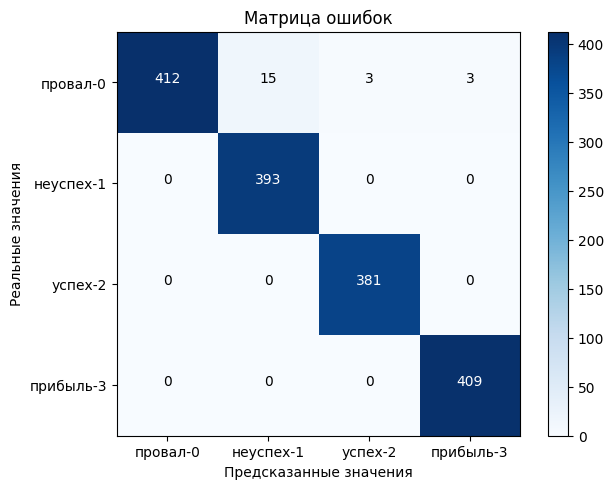

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Создаем матрицу ошибок
confusion_matrix = np.array([[412, 15, 3, 3],
                             [0, 393, 0, 0],
                             [0, 0, 381, 0],
                             [0, 0, 0, 409]])

# Создаем список меток классов
labels = ["провал-0", "неуспех-1", "успех-2", "прибыль-3"]

# Отображение матрицы ошибок
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.colorbar()

# Добавляем метки осей
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Добавляем числа в ячейки
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

# Делаем красивые настройки
plt.tight_layout()
plt.ylabel("Реальные значения")
plt.xlabel("Предсказанные значения")

plt.show()